# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Respuesta 1: Los datos que me ayudarán a resolver el problema son aquellos que me permitan tener un visión global de la situación, es decir, necesito contar con toda la información necesaria para poder describir el problema, todas las características (features) de las propiedades (superficie (m2), cantidad de ambientes, precio, ubicación, antigüedad de la propiedad, etc) como así también deberé contar con una muestra lo suficientemente representativa de manera de poder incoporar la mayoría de las variables para contar con una descripción del comportamiento del modelo lo más completa posible y así llegar a obtener una estimación/predicción lo más cercana a la realidad.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

Pregunta: ¿EL precio depende solo de la ubicación o de la combinación de la ubicación y los metros cuadrados?
Con un primer análisis detecto que las columnas latitud y longitud tienen un 6% de valores nulos pero todos tienen datos con respecto a la zona de bsas(l2) y el barrio(l3) 

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
#sns.set() 
sns.set(style="white", context="talk")
# Definición de Tipo, tamaño, color y ancho de las Fuentes para los títulos de los gráficos
title_font= {"family" : "Cambria",
             "size" : 16,
             "color" : "black",
             "weight" : "roman"}

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

* Para cargar el archivo con extensión csv que contiene el dataset con el cual realizaré mi análisis y mi modelo de ML utilizo la librería PANDAS mediante la cual abrimos el archivo en un dataframe el cual se lo asignamoas a una variable y a partir de ahí comienzo mi análisis exploratorio del mismo.

In [2]:
datam = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
# Lista toda la información de dataframe (features, tipo de datos, etc.)
datam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [3]:
# Imprimo sus filas y columnas
datam.shape

(146660, 19)

In [4]:
# Imprimo sus 5 primeras instncias o filas
datam.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
# Imprimo el nombre de sus columnas
datam.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [6]:
# Imprimo la cantidad de valores faltantes que posee el dataset por columnas
datam.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [7]:
#  Imprimo los tipos de propiedad que contiene el dataset
datam['property_type'].unique() 

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [8]:
# Imprimo la cantidad de instancias por cada tipo de propiedad  
datam['property_type'].value_counts() 

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

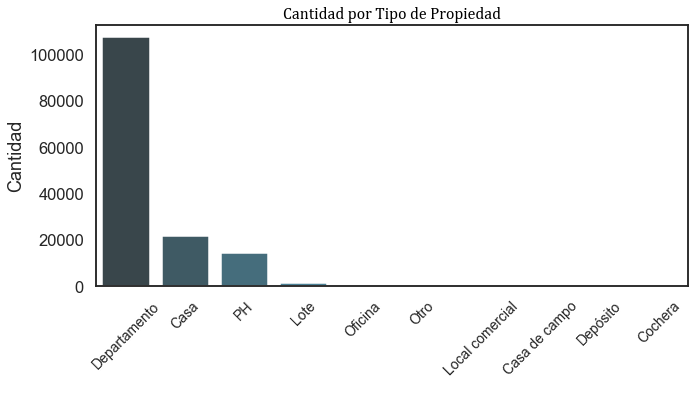

In [9]:
# Gráfico por Tipo de propiedad
#------------------------------------------------------------------------
plt.figure(figsize=(10,6))
ax = sns.countplot(x='property_type',
                   data=datam, order=datam['property_type'].value_counts().index,palette= 'GnBu_d')

ax.set_xticklabels(ax.get_xticklabels(), fontsize= 14, rotation=45)
#plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.xlabel('  ')
plt.title('Cantidad por Tipo de Propiedad', fontdict = title_font )
plt.grid(False) # Este comando enciende la grilla de referencia 
plt.tight_layout()
plt.show()

 El gráfico anterior pone en evidencia que los datos se encuentran sesgados ya que la diferencia entre las instancias de los tipos de propiedad se concentran principalmente en los Departamentos, Casa y PH lo que no me permite visualizar el resto de las propiedades ya que sus cantidades son sustancialmente menor. Considero que por esta diferencia tan amplia de la frecuencia no es posible visualizar en solo gráfico la distribución de los datos. Por este motivo analizaré la frecuencia por tipo de propiedad en dos gráficos dividiendo los tipos de propiedad más frecuentes contra los menos frecuentes y de esta manera observaré mejor su comportamiento.

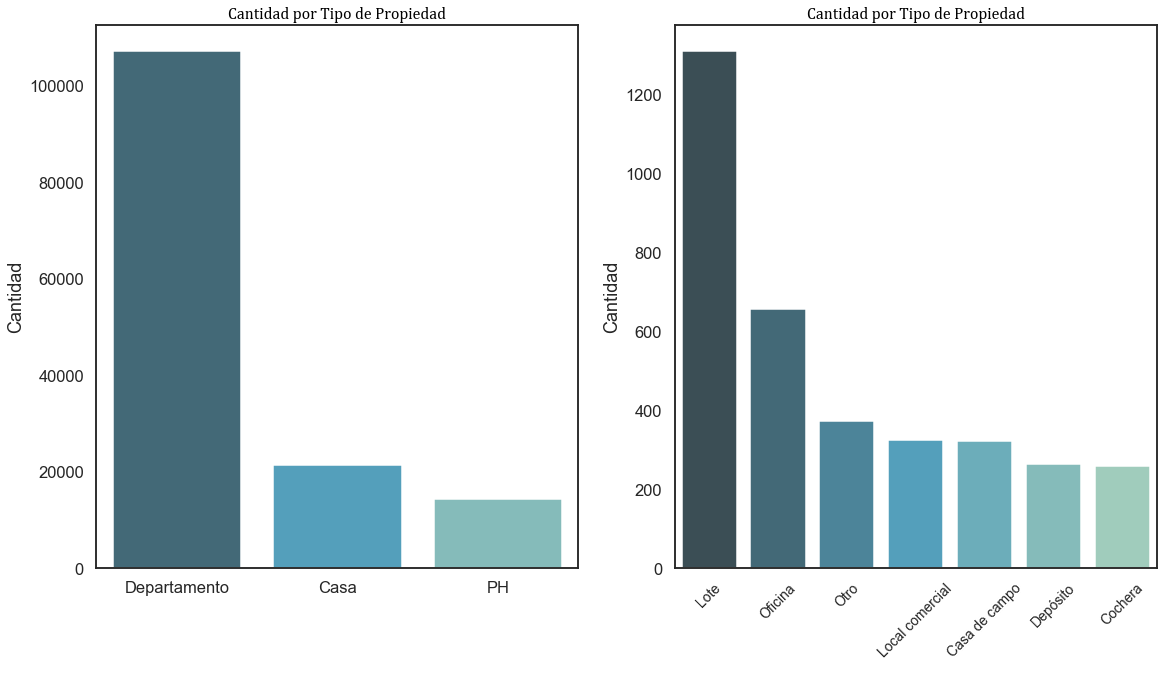

In [10]:
# Gráfico por Tipo de propiedad
#-------------------------------
# *********************************************
# Tipos de Propiedad = Departamento, PH y Casa
#**********************************************

datafmayor=datam[datam.property_type.isin(['Departamento','Casa','PH'])]
datafmenor=datam[~datam.property_type.isin(['Departamento','Casa','PH'])]

plt.figure(figsize=(9.5*2,10))
plt.subplot(1,2,1)
ax = sns.countplot(x='property_type', 
                   data=datafmayor,  order=datafmayor['property_type'].value_counts().index,palette= 'GnBu_d')
ax.set_xticklabels(ax.get_xticklabels())
plt.ylabel('Cantidad')
plt.xlabel(' ')
plt.title('Cantidad por Tipo de Propiedad', fontdict = title_font )
plt.grid(False) 

# ***********************************************************
# El resto de las Propiedades: Lote, Oficina, Depósito, etc.
#************************************************************

plt.subplot(1,2,2)
ax = sns.countplot(x='property_type', 
                   data=datafmenor, order=datafmenor['property_type'].value_counts().index , palette= 'GnBu_d')
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 14, rotation=45)
plt.xlabel('  ')
plt.ylabel('Cantidad')
plt.title('Cantidad por Tipo de Propiedad', fontdict = title_font )
plt.grid(False) 

plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [11]:
# Imprimo las regiones o zonas (features= l2) can su cantidad de publicaciones
datam['l2'].value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

In [12]:
# Imprimo las barrios (features= l3) can su correspondiente cantidad de publicaciones
datam['l3'].value_counts()

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64

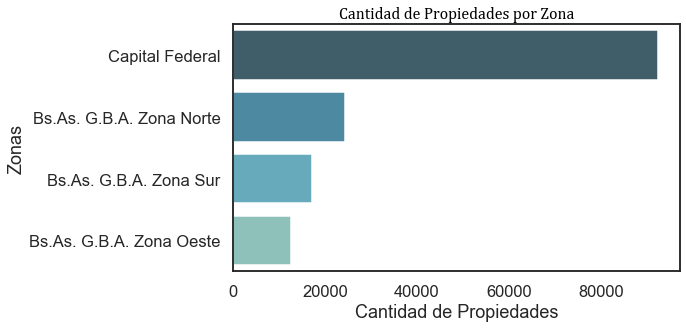

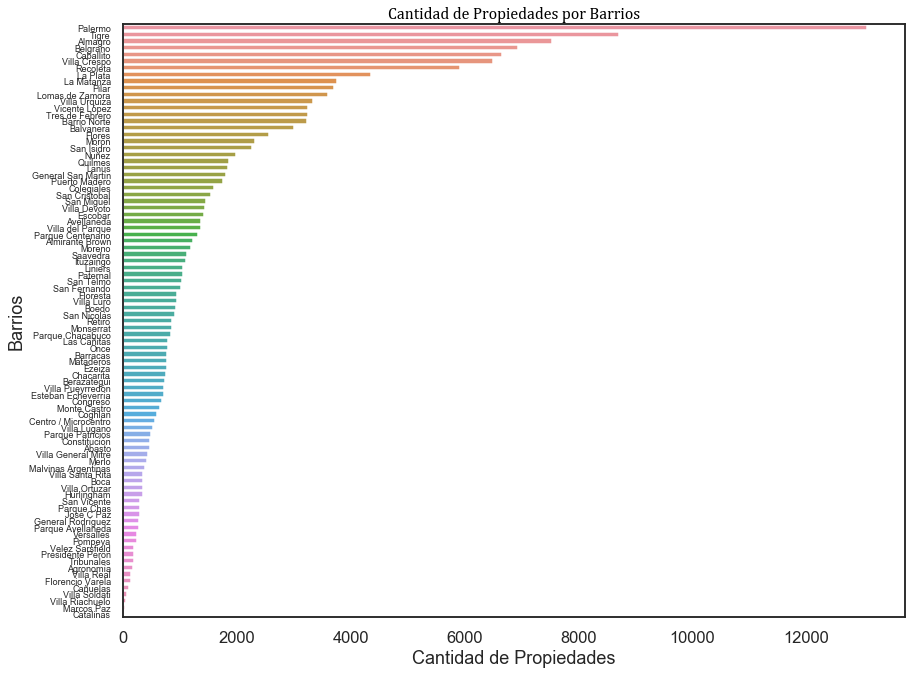

In [13]:
#Gráfico mediante subplot las regiones y barrios
plt.figure(figsize = (8,10))
plt.subplot(2,1,1)
ax = sns.countplot(y='l2', data=datam, order=datam['l2'].value_counts().index,  palette= 'GnBu_d') 
ax.set_yticklabels(ax.get_yticklabels(),  ha="right")
plt.ylabel('Zonas')
plt.xlabel('Cantidad de Propiedades')
plt.title('Cantidad de Propiedades por Zona', fontdict = title_font)

plt.figure(figsize = (14,24))
plt.subplot(2,1,2)
ax = sns.countplot(y='l3', data=datam, order=datam['l3'].value_counts().index)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 9) #rotation=90,
#ax.set(yscale='log') #Cambio la escala del eje x a logaritmica
plt.ylabel('Barrios')
plt.xlabel('Cantidad de Propiedades')
plt.title('Cantidad de Propiedades por Barrios', fontdict = title_font)
plt.grid(False) 
plt.show()

* Con respecto al primer gráfico se puede observar que la mayor parte de las publicaciones se ubican en la zona de Capital Federal y con respecto al segundo gráfico, también se observa una marcada concentración de las propiedades en un grupo sesgado de barrios y cuya diferencia entre los más frecuentes contra los menos frecuentes es sustancialmente grande por ejemplo para el barrio de Palermo tenemos 13073 propiedades publicadas mientras que para el barrio de Catalinas solamente tenemos 5 publicaciones.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [14]:
# Obtengo la muestra con todas las propiedades con zona=Capital Federal y tipo de propiedad=Departamento, Casa y PH.
muestra_propiedad=datam[(datam.l2=='Capital Federal') & (datam.property_type.isin(['Departamento','Casa','PH']))]
muestra_propiedad.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

* Debido a que el dataset posee muchos features considero que las columnas de fecha `start_date, end_date y created_on` no me aportan ningún tipo de información para predecir el precio. Lo mismo sucede con las columnas  `latitud` y  `longitud` pero en este caso también presentan además algunos valores faltantes. Y por último la columnas  `currency, title, description y operation_type` también las dejo afuera de mi muestra ya que considero que son features no determinantes para poder predicir el precio de una propiedad. 

* Como conclusión, considero que las columnas `property_type, l3(barrios),rooms(ambientes), bedrooms, bathrooms, surface_total y surface_covered` son las que serán más útiles y que a través de su comportamiento podré llegar a predecir el precio de una propiedad. 

In [15]:
# Creo el nuevo dataframe con las columnas seleccionadas
data = muestra_propiedad[['property_type', 'l3','rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price']]
data.shape

(91485, 8)

In [16]:
# Imprimo las 5 primeras instancias 
data.head()

,property_type,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
1,PH,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
5,PH,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0


In [17]:
# Mediante el describe() obtengo una resumen estadístico de la muestra
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


* Se observa que tanto la superficie total como la superficie cubierta tienen valores máximos y mínimos muy alejados de la media y esto también se visualiza con los tres cuantiles donde vemos que esos máximos y mínimos son atípicos. Lo mismo sucede con la columna precio.

In [18]:
# Selecciona las propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
data = data[(data.surface_total >= 15) & (data.surface_total <= 1000)]
data.shape

(82405, 8)

In [19]:
# Selecciona las propiedades cuya precio es menor 4000000 dólares.
data = data[(data.price <= 4000000)]
data.shape

(82373, 8)

In [20]:
#Verifica si hay instancias con valores faltantes
data.isna().sum()

property_type        0
l3                   0
rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64

In [21]:
# Elimino de la muestra aquellas instancias que tienen valores faltantes o nulos.
data= data.dropna() 
data.shape

(81019, 8)

In [22]:
# Vuelvo a estudiar los estadísticos de la muestra para ver como quedaron después de la limpieza que realicé.
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


* **6.A)** Puedo observar que aún sigo teniendo valores máximos como mínimos de las columnas Surface_Total y Surface_covered que no tienen mucho sentido debido que es imposible que exista una propiedad con superficie cubierta de 1 metro como mínimo y de 17220 metros cuadrados como máximo. Observando los quantiles se observa una inconsistencia de los datos entre la superficie total y la cubierta, lo lógico es que la superficie cubierta no supere la superfice total.

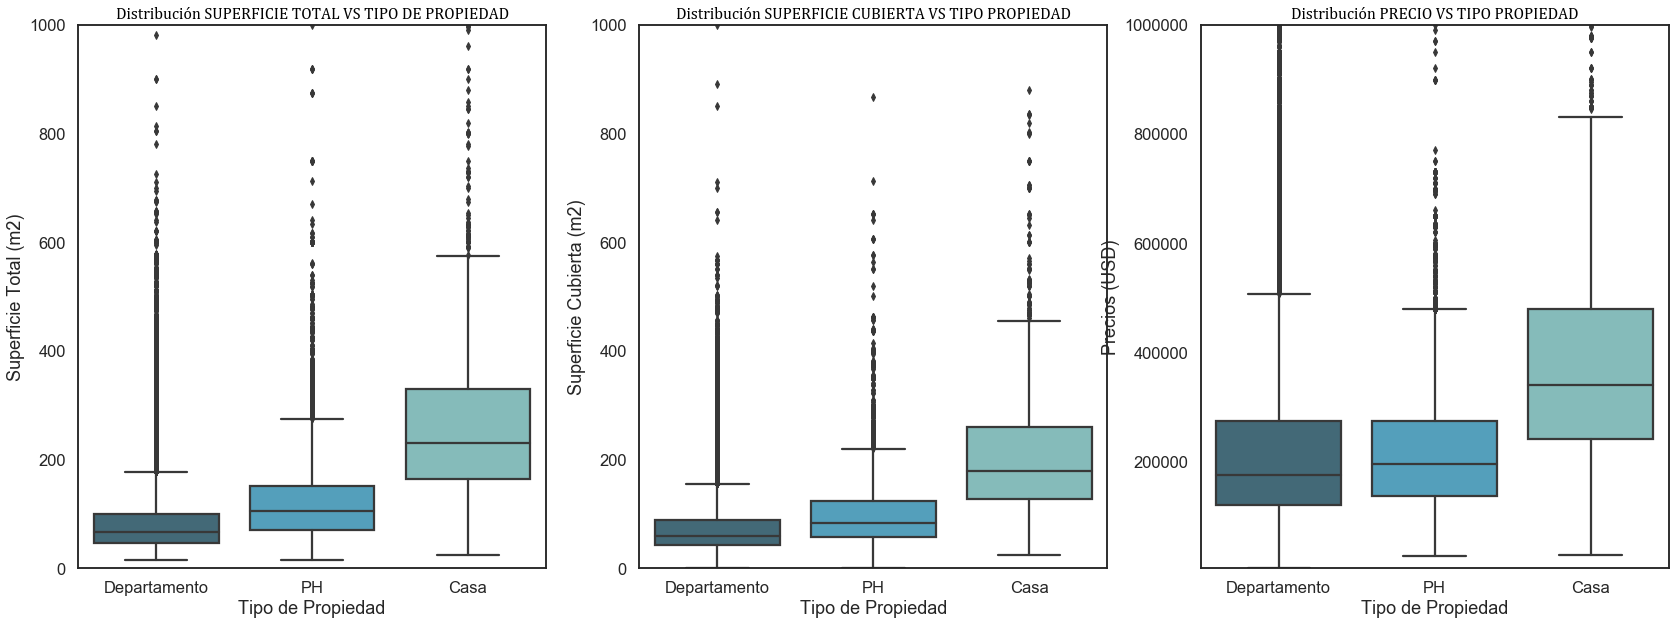

In [23]:
# *****************************************************************************
# ANALIZO LA RELACION PROPERTY_TYPE VS SURFACE_TOTAL - SURFACE_COVERED - PRICE
# *****************************************************************************
# Primero mediante un BOXPLOT
# ***********************
#      SURFACE_TOTAL     
# ***********************
plt.figure(figsize=(9.5*3,10))
plt.subplot(1,3,1)
sns.boxplot(data = data, x = 'property_type', y = 'surface_total', palette= 'GnBu_d')
plt.title('Distribución SUPERFICIE TOTAL VS TIPO DE PROPIEDAD',fontdict = title_font)
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie Total (m2)')
plt.ylim(0,1000)

# ***********************
#      SURFACE_COVERED   
# ***********************
plt.subplot(1,3,2)
sns.boxplot(data = data, x = 'property_type', y = 'surface_covered', palette= 'GnBu_d')
plt.title('Distribución SUPERFICIE CUBIERTA VS TIPO PROPIEDAD', fontdict = title_font)
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie Cubierta (m2)')
plt.ylim(0,1000)

# ***********************
#        PRICE  
# ***********************
plt.subplot(1,3,3)
sns.boxplot(data = data, x = 'property_type', y = 'price',palette= 'GnBu_d')
plt.title('Distribución PRECIO VS TIPO PROPIEDAD' ,fontdict = title_font)
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precios (USD)')
plt.ylim(5000,1000000)

plt.show();


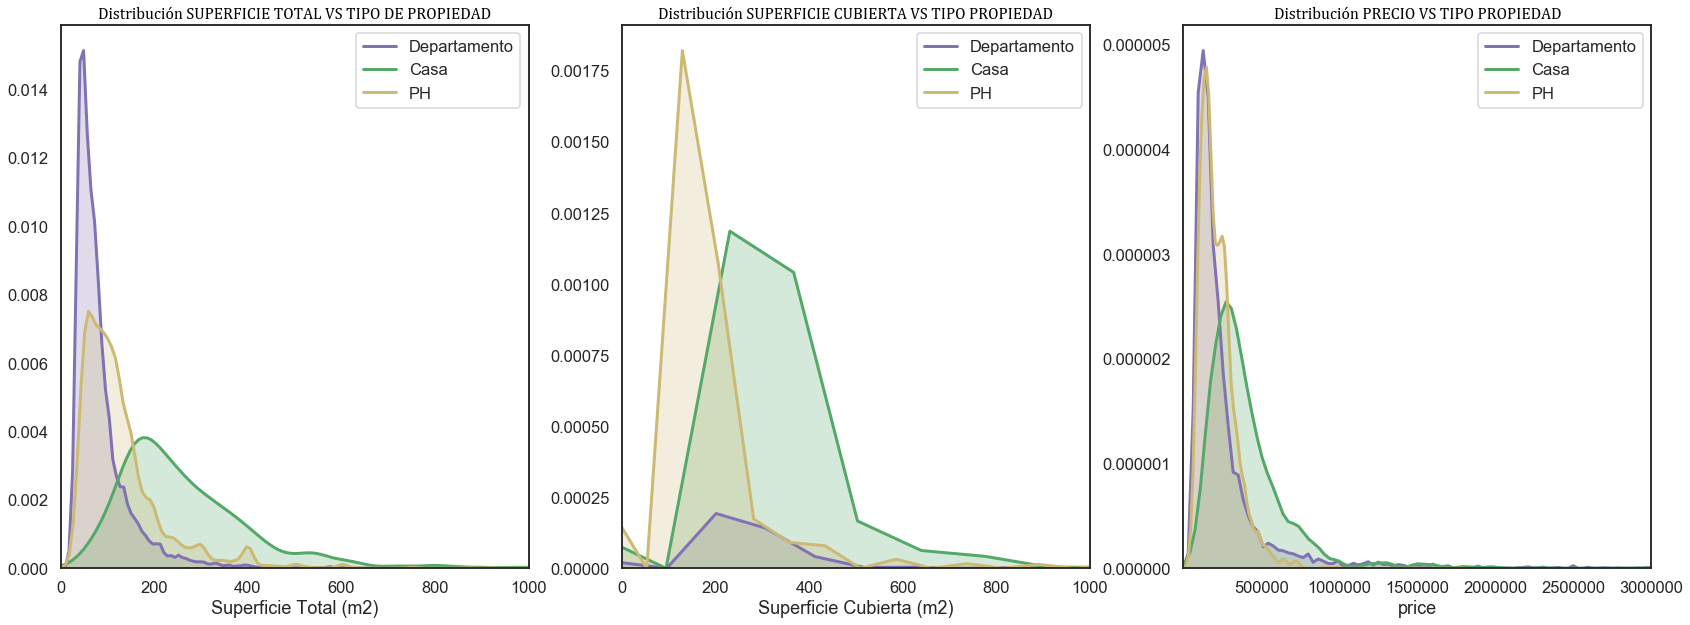

In [24]:
# *****************************************************************************
# ANALIZO LA RELACION PROPERTY_TYPE VS SURFACE_TOTAL - SURFACE_COVERED - PRICE
# *****************************************************************************
# Mediante una DISTPLOT
# ***********************
#      SURFACE_TOTAL     
# ***********************
plt.figure(figsize=(9.5*3,10))
plt.subplot(1,3,1)
sns.distplot(a=data[data.property_type == 'Departamento'].surface_total, hist=False, label= 'Departamento', 
             kde_kws={'shade': True, 'lw': 3, 'color': 'm' })
sns.distplot(a=data[data.property_type == 'Casa'].surface_total,  hist=False, label= 'Casa', 
             kde_kws={'shade': True, 'lw': 3, 'color': 'g' })
sns.distplot(a=data[data.property_type == 'PH'].surface_total, hist=False, label= 'PH', 
             kde_kws={'shade': True, 'lw': 3, 'color': 'y' })
plt.title('Distribución SUPERFICIE TOTAL VS TIPO DE PROPIEDAD',fontdict = title_font)
plt.xlabel('Superficie Total (m2)')
plt.xlim(0,1000)

# ***********************
#      SURFACE_COVERED   
# ***********************
plt.subplot(1,3,2)
sns.distplot(a=data[data.property_type == 'Departamento'].surface_covered, hist=False, label= 'Departamento', 
             kde_kws={'shade': True, 'lw': 3, 'color': 'm' } )
sns.distplot(a=data[data.property_type == 'Casa'].surface_covered,  hist=False, label= 'Casa', 
             kde_kws={'shade': True, 'lw': 3, 'color': 'g' })
sns.distplot(a=data[data.property_type == 'PH'].surface_covered, hist=False, label= 'PH', 
             kde_kws={'shade': True, 'lw': 3, 'color': 'y' })
plt.title('Distribución SUPERFICIE CUBIERTA VS TIPO PROPIEDAD', fontdict = title_font)
plt.xlabel('Superficie Cubierta (m2)')
plt.xlim(0,1000)

# ***********************
#        PRICE  
# ***********************
plt.subplot(1,3,3)
sns.distplot(a=data[data.property_type == 'Departamento'].price, hist=False, label= 'Departamento', 
             kde_kws={'shade': True, 'lw': 3, 'color': 'm' } )
sns.distplot(a=data[data.property_type == 'Casa'].price,  hist=False, label= 'Casa', 
             kde_kws={'shade': True, 'lw': 3, 'color': 'g' })
sns.distplot(a=data[data.property_type == 'PH'].price, hist=False, label= 'PH', 
             kde_kws={'shade': True, 'lw': 3, 'color': 'y' })
#axplt.title('Distribución del Precio', fontdict = title_font)
ax.set_xlabel('Precios de la Propiedades (USD)')
ax.set_ylabel('Frecuencia')
plt.xlim(10, 3000000)
plt.title('Distribución PRECIO VS TIPO PROPIEDAD' ,fontdict = title_font)

plt.grid(False)
plt.show();

In [25]:
# Imprimo la media y la mediana de la superfice total por cada tipo de propiedad
print(  'DEPARTAMENTO --- Media: ', str(data[data.property_type == 'Departamento'].surface_total.mean()),
      'Mediana: ', str(data[data.property_type == 'Departamento'].surface_total.median()))
print(  'CASA --- Media: ', str(data[data.property_type == 'Casa'].surface_total.mean()),
      'Mediana: ', str(data[data.property_type == 'Casa'].surface_total.median()))
print(  'PH --- Media: ', str(data[data.property_type == 'PH'].surface_total.mean()),
      'Mediana: ', str(data[data.property_type == 'PH'].surface_total.median()))

DEPARTAMENTO --- Media:  85.55825025608472 Mediana:  67.0
CASA --- Media:  261.6484593837535 Mediana:  230.0
PH --- Media:  129.16833960685906 Mediana:  105.0


In [26]:
# Imprimo la media y la mediana de la superfice cubierta por cada tipo de propiedad
print(  'DEPARTAMENTO --- Media: ', str(data[data.property_type == 'Departamento'].surface_covered.mean()),
      'Mediana: ', str(data[data.property_type == 'Departamento'].surface_covered.median()))
print(  'CASA --- Media: ', str(data[data.property_type == 'Casa'].surface_covered.mean()),
      'Mediana: ', str(data[data.property_type == 'Casa'].surface_covered.median()))
print(  'PH --- Media: ', str(data[data.property_type == 'PH'].surface_covered.mean()),
      'Mediana: ', str(data[data.property_type == 'PH'].surface_covered.median()))

DEPARTAMENTO --- Media:  78.39325956169839 Mediana:  60.0
CASA --- Media:  218.9047619047619 Mediana:  178.0
PH --- Media:  102.28554997908824 Mediana:  84.0


In [27]:
# Imprimo la media y la mediana del precio por cada tipo de propiedad
print(  'DEPARTAMENTO --- Media: ', str(data[data.property_type == 'Departamento'].price.mean()),
      'Mediana: ', str(data[data.property_type == 'Departamento'].price.median()))
print(  'CASA --- Media: ', str(data[data.property_type == 'Casa'].price.mean()),
      'Mediana: ', str(data[data.property_type == 'Casa'].price.median()))
print(  'PH --- Media: ', str(data[data.property_type == 'PH'].price.mean()),
      'Mediana: ', str(data[data.property_type == 'PH'].price.median()))

DEPARTAMENTO --- Media:  265676.22241138027 Mediana:  175000.0
CASA --- Media:  399329.3594771242 Mediana:  340000.0
PH --- Media:  219615.9300501882 Mediana:  194950.0


* Se puede visualizar en los gráficos  `BOXPLOT` que las distribuciones de las diferentes variables no son simétricas dado que la media no se encuentra en el centro de la caja, es decir, que no coinciden  la media, la mediana y la moda además los datos están concentrados en la parte superior de la caja. También, mediante el  `BOXPLOT` se puede evidenciar que todas las distribuciones presentan muchos valores atípicos o outliers, a pesar que en la construcción de ambos gráficos apliqué límites para los valores de ambos ejes (x e y). Mediante los gráficos  `DISTPLOT` más el cálculo de la media y mediana de las features analizadas puedo inferir que todas las distribuciones poseen una asimetría positiva (o a la derecha) esto se debe a que la mediana es menor a la media lo que significa que los datos están concetrados en la parte izquierda de la media y más separados a la derecha de la misma.

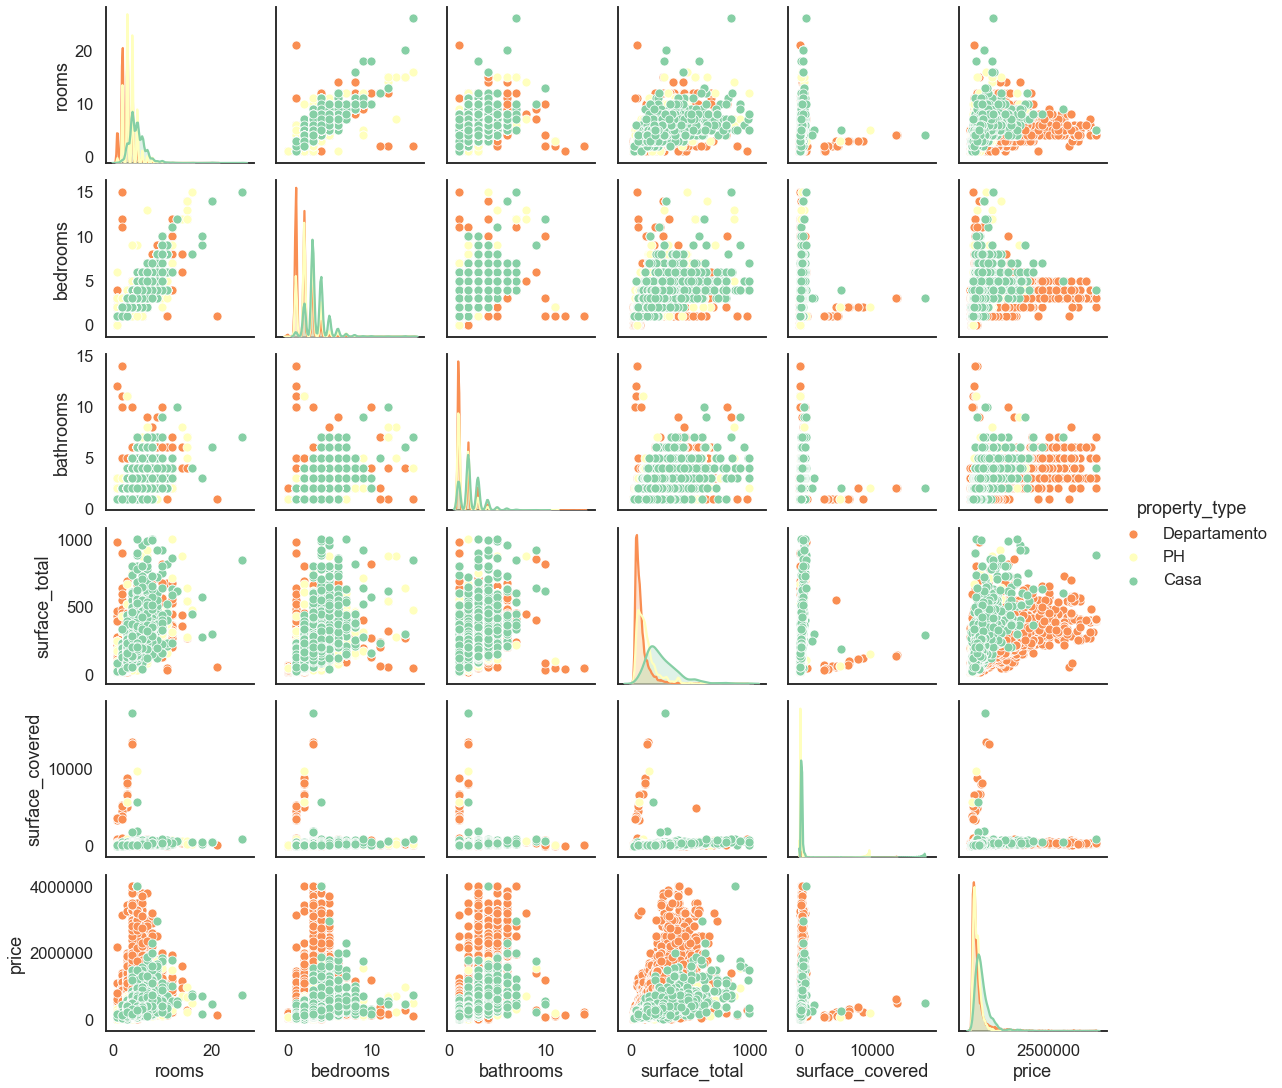

In [28]:
sns.pairplot(data[['property_type','rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price']], hue = 'property_type', palette='Spectral')
plt.savefig("salida.png")

* Este gráfico de  `PAIRPLOT` me permite tener una visión general de las relaciones y comportamiento de las diferentes features. En general a simple vista observo que los tipos de propiedad Casa y Departamentos son los más presentes en la muestra. Además con respecto a la relación del precio con el resto de las columnas se puede inferir que tanto la superfice total, los baños, los dormitorios y los ambientes(rooms) son las que presentan mejor correlación siendo levemente superior la superfice total. 

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [29]:
# Agrupo los datos por tipos de propiedad
data.groupby(by='property_type').size()

property_type
Casa             2142
Departamento    69313
PH               9564
dtype: int64

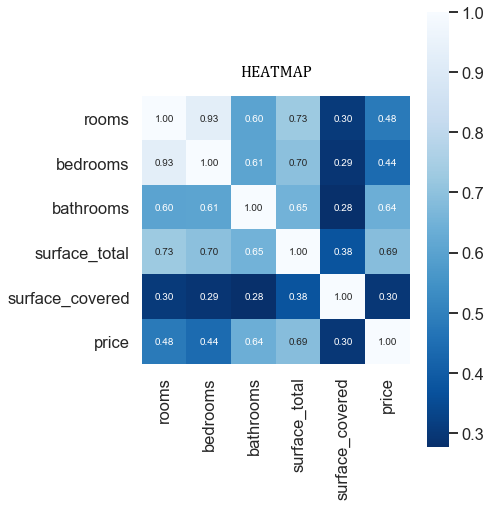

In [30]:
# HEATMAP
datacorr= data[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
corr = datacorr.corr()
plt.figure(figsize=(6,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= datacorr.columns, 
           yticklabels= datacorr.columns,
           cmap='Blues_r',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size= 'medium', fontsize = 8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, size= 'medium', fontsize = 8)
plt.title('HEATMAP', fontdict= title_font, pad= 20)
plt.show()


* Observando el mapa de calor se vuelve a confirmar lo descubierto a través del gráfico de PAIRPLOT, que la mejor variable para predecir el precio sigue siendo la  `superficie total`, y le siguen los baños, los ambientes (rooms) y los dormitorios. A continuación realizo un mapa de calor por tipo de propiedad para verficar si se mantiene la misma correlación.

In [31]:
# Armo tres muestra segun el tipo de propiedad para estudiar la correlación dependiendo el tipo de propiedad
data_ph = data[data.property_type == 'PH']
data_ph.shape

(9564, 8)

In [32]:
data_casa = data[data.property_type == 'Casa']
data_casa.shape

(2142, 8)

In [33]:
data_depto = data[data.property_type == 'Departamento']
data_depto.shape

(69313, 8)

In [34]:
datacorr_ph = data_ph[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
datacorr_casa = data_casa[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
datacorr_depto = data_depto[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

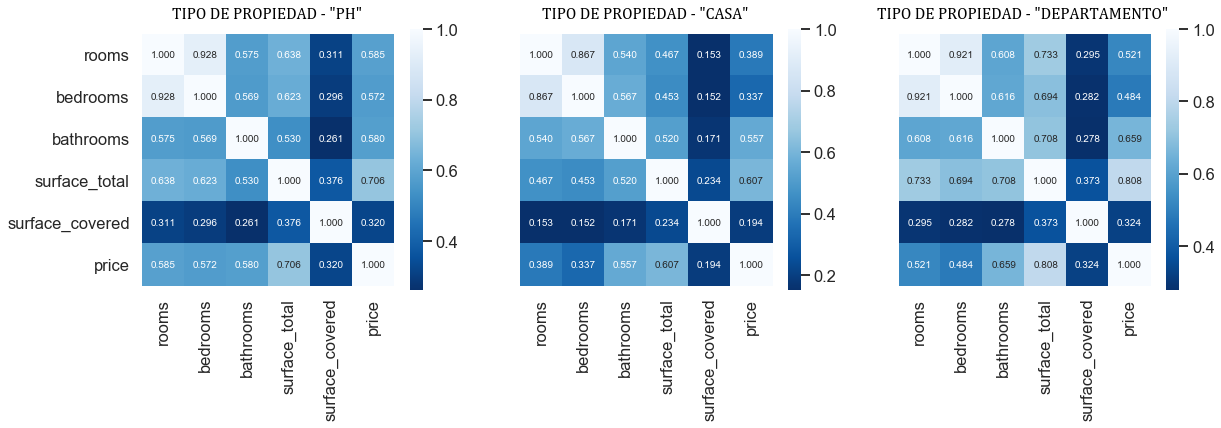

In [35]:
# HEATMAP por TIPO DE PROPIEDAD
corr_ph = datacorr_ph.corr()
corr_casa = datacorr_casa.corr()
corr_depto = datacorr_depto.corr()
plt.figure(figsize=(6.4*3,4.8))

#***********************************
#  Tipo de Propiedad = "PH"
#***********************************
plt.subplot(1,3,1)
sns.heatmap(corr_ph, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= datacorr_ph.columns,  
           yticklabels= datacorr_ph.columns,
           cmap='Blues_r')
plt.title('TIPO DE PROPIEDAD - "PH" ', fontdict = title_font, pad=15)

#***********************************
#  Tipo de Propiedad = "CASA"
#***********************************
plt.subplot(1,3,2)
sns.heatmap(corr_casa, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           yticklabels= False, 
           xticklabels= datacorr_casa.columns,
           cmap='Blues_r')
plt.title('TIPO DE PROPIEDAD - "CASA" ', fontdict = title_font, pad=15)

#*************************************
#  Tipo de Propiedad = "DEPARTAMENTO"
#*************************************
plt.subplot(1,3,3)
sns.heatmap(corr_depto, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           yticklabels= False, 
           xticklabels= datacorr_depto.columns,
           cmap='Blues_r')
plt.title('TIPO DE PROPIEDAD - "DEPARTAMENTO" ', fontdict = title_font, pad=15)



plt.show()


* Se puede observar que el mapa de calor discriminado por TIPO DE PROPIEDAD sigue manteniendo a la feature  `superficie total` como la mejor variable para predecir el precio. 

* **¿Cuáles son las mejores variables para predecir el precio?**
Las mejores features para predecir el precio son primeramente la  `superfice total` y le siguen en menor medida los bathrooms, rooms y bedrooms.

* **¿Qué diferencias encuentras según cada tipo de propiedad?**
Dependiendo del tipo de propiedad se mejora la correlación entre el precio y la superficie total, dado que la muestra más grande está representada por los departamentos dicha correlación es la más alta.

* **Conclusión**
Por todo lo antes analizado mediante la utilización de los gráficos de **BOXPLOT, DISTPLOT y HEATMAT** se observa en general que la muestra esta sesgada ya que posee más instancias para el tipo de propiedad DEPARTAMENTO que para el resto de las propiedades (CASA y PH) por esto motivo considero que el Machine Learning sería más certero si hiciera uno modelo de ML por cada tipo de propiedad.

### 2.1 Desafío

 * **1- ¿En cuáles barrios se encuentran la mayoría de las propiedades con tres ambientes o más?**
   
 * **2- ¿Cuál es la distribución del precio en los diferentes barrios para dichas propiedades?** 

In [36]:
# Selecciono del dataset solo aquellas propiedades que tienen más de 3 ambientes (rooms)
d1 = data[data.rooms >= 3]

In [37]:
# Imprimo los cantidad de filas y columnas 
d1.shape

(50127, 8)

In [38]:
# Listo un resumen de los estadísticos más comunes
d1.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,50127.000000,50127.000000,50127.000000,50127.000000,50127.000000,5.012700e+04
mean,3.760688,2.623037,1.845752,124.048218,109.483392,3.416880e+05
std,1.089291,0.864947,0.941802,84.818490,180.349895,3.528585e+05
min,3.000000,1.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,3.000000,2.000000,1.000000,72.000000,65.000000,1.700000e+05
50%,3.000000,2.000000,2.000000,96.000000,84.000000,2.400000e+05
75%,4.000000,3.000000,2.000000,145.000000,124.000000,3.600000e+05
max,26.000000,15.000000,11.000000,1000.000000,17220.000000,4.000000e+06


In [39]:
# Imprimo la cantidad de barrios del dataset
d1['l3'].nunique()

57

In [40]:
# Imprimo la cantidad de propiedades por barrios
d1['l3'].value_counts()

Palermo                 7359
Almagro                 4529
Belgrano                3962
Recoleta                3945
Caballito               3561
Villa Crespo            3085
Barrio Norte            2109
Flores                  1491
Balvanera               1460
Villa Urquiza           1456
Puerto Madero           1194
Nuñez                   1052
Parque Centenario        963
Villa Devoto             902
Villa del Parque         752
Colegiales               650
Paternal                 576
San Cristobal            572
Floresta                 513
Retiro                   498
Saavedra                 496
Once                     477
Las Cañitas              446
Barracas                 439
San Telmo                430
Parque Chacabuco         414
Boedo                    413
Monserrat                409
Villa Lugano             397
Mataderos                375
Congreso                 357
San Nicolás              353
Chacarita                353
Villa Pueyrredón         352
Liniers       

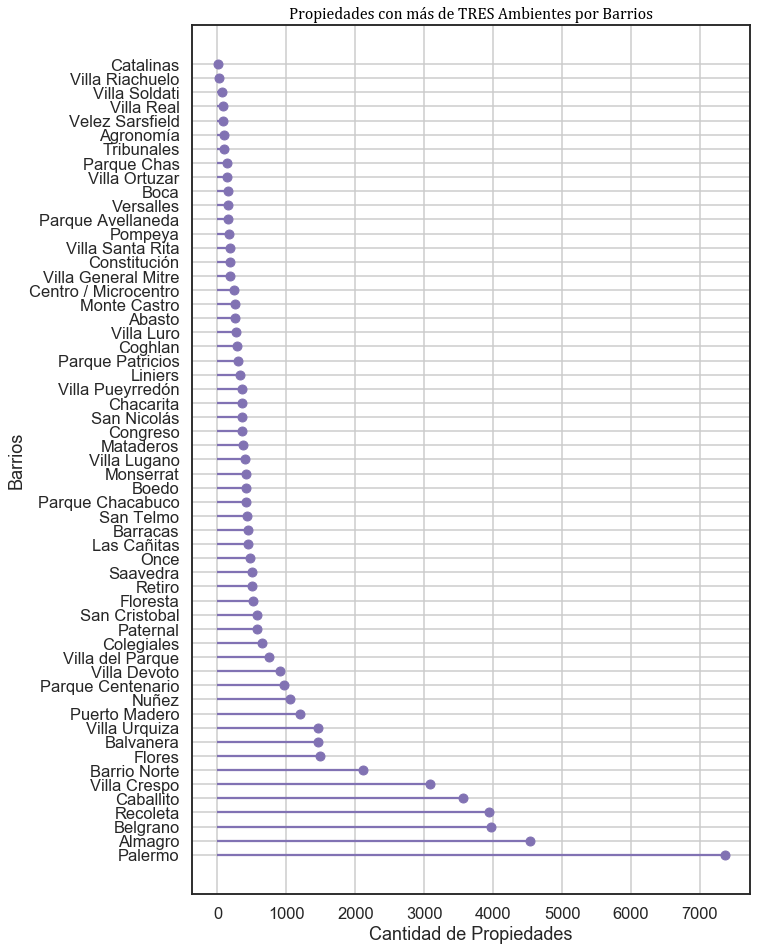

In [41]:
# Distribución de las propiedades con más de 3 ambientes según el barrio
rango= d1['l3'].value_counts().index

plt.figure(figsize=(10,16))
plt.hlines(y=rango, xmin=0, xmax=d1['l3'].value_counts(), color='m')
plt.plot(d1['l3'].value_counts(), rango, "o", color = 'm')
 
plt.title('Propiedades con más de TRES Ambientes por Barrios', fontdict=title_font)
plt.xlabel('Cantidad de Propiedades')
plt.ylabel('Barrios')
plt.grid(True)
plt.show();



* Se puede observar que la mayoría de las propiedades de más de tres ambientes se encuentran concentradas en un número reducido de barrios (13 o 14 del total que son 57 barrios) y en el resto de los barrios el números de las mismas es bajo y se mantiene constante. Por el motivo antes mencionado analizaré la distibución del precio de acuerdo al tipo de propiedad en aquellos barrios donde hay mayor concentración de propiedades con más de 3 ambientes.

In [42]:
# Genero un nuevo dataset con los barrios en donde las propiedades con más de 3 ambientes posee mayor concentración
d1_mascon= d1[d1.l3.isin(['Palermo','Almagro','Belgrano','Recoleta', 'Caballito', 'Villa Crespo','Barrio Norte', 'Flores',
                          'Balvanera', 'Villa Urquiza','Puerto Madero', 'Nuñez', 'Parque Centenario', 'Villa Devoto'])]

In [43]:
# Imprimo la cantidad de barrios del nuevo dataset
d1_mascon['l3'].nunique()

14

In [44]:
# Imprimo por barrio la cantidad de propiedades con más de 3 ambientes discriminado el tipo de propiedad
d1_mascon.groupby('l3')['property_type'].value_counts()


l3                 property_type
Almagro            Departamento     3834
                   PH                677
                   Casa               18
Balvanera          Departamento     1126
                   PH                316
                   Casa               18
Barrio Norte       Departamento     2038
                   PH                 68
                   Casa                3
Belgrano           Departamento     3753
                   PH                131
                   Casa               78
Caballito          Departamento     2933
                   PH                517
                   Casa              111
Flores             Departamento     1087
                   PH                244
                   Casa              160
Nuñez              Departamento      881
                   PH                109
                   Casa               62
Palermo            Departamento     6435
                   PH                863
                   Casa 

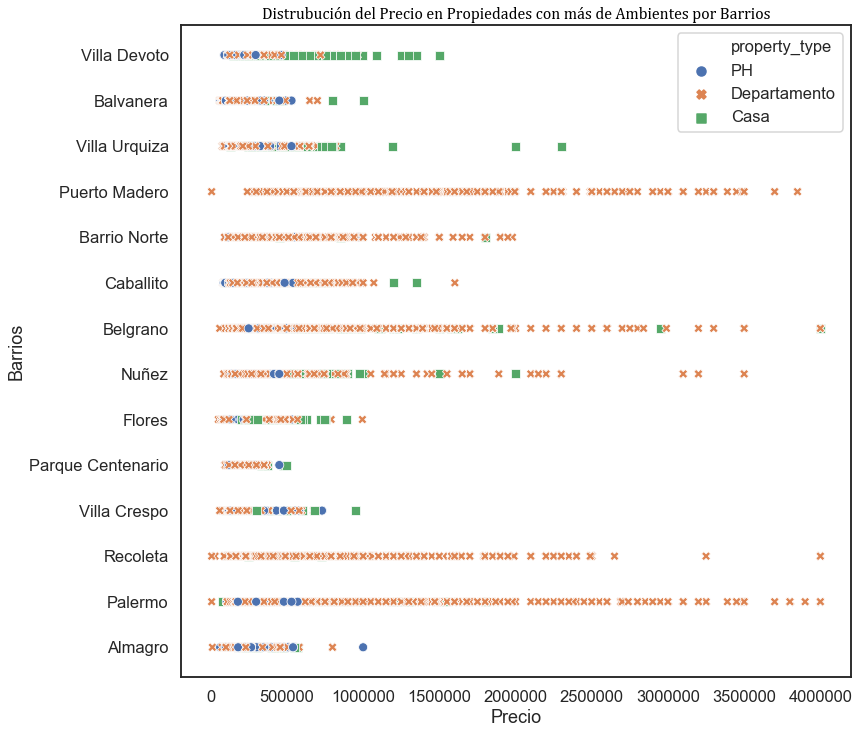

In [45]:
# Graáfico de Dispersión para estudiar la distribución del precio de las propiedades de más de tres ambientes 
# teniendo en cuenta el tipo de propiedad

plt.figure(figsize=(12,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(y='l3', x='price', hue='property_type', style='property_type',
                     data=d1_mascon )

plt.title('Distrubución del Precio en Propiedades con más de Ambientes por Barrios', fontdict=title_font)
plt.ylabel('Barrios')
plt.xlabel('Precio')
plt.grid(False)
plt.show;

**Conclusión:**

 **1- ¿En cuáles barrios se encuentran la mayoría de las propiedades con tres ambientes o más?** 
      Los barrios que presentan la mayor concentración de propiedades con más de 3 ambientes están constituidos por 14 de los 57 barrios que conforman el total de la muestra,  por lo que considero que la muestra está sesgada lo que me limita para responder la pregunta planteada.
   
   **2- ¿Cuál es la distribución del precio en los diferentes barrios para dichas propiedades?** 
   A través del un gráfico de **SCATTER** analicé la distrubución del precio y concluyo que los datos nuevamente están sesgados por en este caso es por el feature tipo de propiedad ya que la mayoría de las precios están concentrados en los  DEPARTAMENTOS por lo que mi respuesta no sería lo más certera ya que no cuento con información relevante para los tipos de propiedad (PH y CASA).

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades `en la Ciudad Autónoma de Buenos Aires(`Capital Federal`)`. Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

** El modelo de Machine Learning que voy a implementar es un modelo de **`Regresión`** ya que la variable que debo predecir es el  `PRECIO` la cual representa un valor numérico y continuo. 

In [46]:
# Importo todas las librerías necesarias para realizar el ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [47]:
# Genero mi nuevo dataframe con las 6 columnas solicitadas
data_fin = data[['rooms', 'bedrooms','bathrooms','surface_covered','surface_total','price']]
data_fin.shape

(81019, 6)

In [48]:
# Lo primero es descartar de la muestra todas las propiedades cuya superficie total sea menor que la cubierta.
data_fin = data_fin[~(data_fin.surface_covered > data.surface_total)]
data_fin.shape

(80276, 6)

In [49]:
# Selecciono las variables predictoras (X) y la variable a predecir (y).
X = data_fin[['rooms','bedrooms','bathrooms','surface_covered','surface_total']]
y = data_fin['price']

In [50]:
# Defino los datos para de training and testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)


**`BENCHMARK`**

**HIPÓTESIS:** Entreno y predigo con un modelo de regresión lineal  `(LinearRegression)` .

In [51]:
# ***************************************
#   MODELO HIPÓTESIS = LinearRegression 
# ***************************************

# Defino el modelo el valor profundidad del arbol deseado
lineal = LinearRegression()
  
# Entreno el modelo
lineal.fit(X_train,y_train)
    
# Predigo y evaluo sobre el set de entrenamiento
y_train_pred = lineal.predict(X_train)
train_r2= r2_score(y_train, y_train_pred)
print(f'Error R2 en Train: {train_r2}')
    
# Predigo y evaluo sobre el set de evaluación
y_test_pred = lineal.predict(X_test)
test_r2 = r2_score(y_test,y_test_pred)
print(f'Error R2 en Test: {test_r2}')


Error R2 en Train: 0.6306438506492839
Error R2 en Test: 0.6078892875489067


In [52]:
# ***********************************
#   MODELO = DecissionTreeRegressor
# ***********************************

# Defino las listas vacias para los valores de r2_score
lista_r2_train_t = []
lista_r2_test_t = []

# Defino la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,12,14]

# Genero un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Repeto el siguiente bloque de código
    
    # Defino el modelo el valor profundidad del arbol deseado
    clft = DecisionTreeRegressor(max_depth = max_depth ,random_state=42)
  
    # Entreno el modelo
    clft.fit(X_train,y_train)
    
    # Predigo y evaluo sobre el set de entrenamiento
    y_train_pred = clft.predict(X_train)
    train_r2= r2_score(y_train, y_train_pred)
    print(f'Profundidad del Árbol: {max_depth} ')
    print(f'Error R2 en Train: {train_r2}')
    
    
    # Predigo y evaluo sobre el set de evaluación
    y_test_pred = clft.predict(X_test)
    test_r2 = r2_score(y_test,y_test_pred)
    print(f'Error R2 en Test: {test_r2}')
    
    # Agrego la información a las listas
    lista_r2_train_t.append(train_r2)
    lista_r2_test_t.append(test_r2)

Profundidad del Árbol: 1 
Error R2 en Train: 0.39460987557987537
Error R2 en Test: 0.37174957173225986
Profundidad del Árbol: 2 
Error R2 en Train: 0.5449528345197696
Error R2 en Test: 0.5128799113228903
Profundidad del Árbol: 3 
Error R2 en Train: 0.6095795370964068
Error R2 en Test: 0.5758566367406615
Profundidad del Árbol: 4 
Error R2 en Train: 0.668960927422265
Error R2 en Test: 0.6220261325864722
Profundidad del Árbol: 5 
Error R2 en Train: 0.7060590407926521
Error R2 en Test: 0.6651793619481593
Profundidad del Árbol: 6 
Error R2 en Train: 0.7351129903862494
Error R2 en Test: 0.6917814232700854
Profundidad del Árbol: 7 
Error R2 en Train: 0.7599060846731839
Error R2 en Test: 0.6956578374897775
Profundidad del Árbol: 8 
Error R2 en Train: 0.7866261874676538
Error R2 en Test: 0.7133606424942206
Profundidad del Árbol: 9 
Error R2 en Train: 0.8150532525766818
Error R2 en Test: 0.7267900681917225
Profundidad del Árbol: 10 
Error R2 en Train: 0.8415539004016336
Error R2 en Test: 0.74003

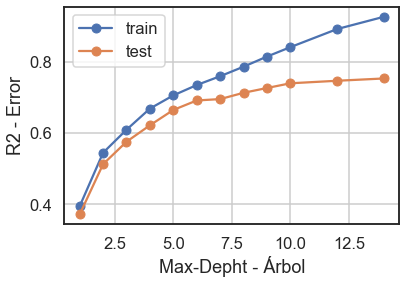

In [53]:
plt.plot(max_depths,lista_r2_train_t,'o-',label='train' )
plt.plot(max_depths,lista_r2_test_t,'o-',label='test')
plt.legend()
plt.xlabel('Max-Depht - Árbol')
plt.ylabel('R2 - Error')

plt.grid()
plt.show()

In [54]:
# ***********************************
#   MODELO = KNeighborsRegressor
# ***********************************

# Defino las listas vacias para los valores de r2_score
lista_r2_train_k = []
lista_r2_test_k = []

# Defino la lista de valores de k que vamos a explorar
k_vecinos = [1,3,5,7,9,11,13,15,17,20,25,30,35,40,50]

# Genero un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Repito el siguiente bloque de código
    
    # Defino el modelo con el valor de vecinos deseado
    clfk = KNeighborsRegressor(n_neighbors= k)
    
    # Entreno el modelo
    clfk.fit(X_train,y_train)
    
    # Predigo y evaluo sobre el set de entrenamiento
    y_train_pred = clfk.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    print(f'Nro. de Vecinos: {k} ')
    print(f'Error R2 en Train: {train_r2}')
    
    # Predigo y evaluo sobre el set de evaluación
    y_test_pred = clfk.predict(X_test)
    test_r2= r2_score(y_test, y_test_pred)
    print(f'Error R2 en Test: {test_r2}')
     
    
    # Agrego la información a las listas
    lista_r2_train_k.append(train_r2)
    lista_r2_test_k.append(test_r2)

Nro. de Vecinos: 1 
Error R2 en Train: 0.9427322013856759
Error R2 en Test: 0.7151258510181553
Nro. de Vecinos: 3 
Error R2 en Train: 0.8779833694475176
Error R2 en Test: 0.7421415498302502
Nro. de Vecinos: 5 
Error R2 en Train: 0.8332073933460908
Error R2 en Test: 0.7410973839185099
Nro. de Vecinos: 7 
Error R2 en Train: 0.8036144063923135
Error R2 en Test: 0.7303539007689526
Nro. de Vecinos: 9 
Error R2 en Train: 0.7842235871442758
Error R2 en Test: 0.7131921664932912
Nro. de Vecinos: 11 
Error R2 en Train: 0.7699297901624351
Error R2 en Test: 0.7068751786732872
Nro. de Vecinos: 13 
Error R2 en Train: 0.7555322752506626
Error R2 en Test: 0.7008432503376273
Nro. de Vecinos: 15 
Error R2 en Train: 0.7452164150254228
Error R2 en Test: 0.6945050402542647
Nro. de Vecinos: 17 
Error R2 en Train: 0.7367442458700857
Error R2 en Test: 0.6862696778532505
Nro. de Vecinos: 20 
Error R2 en Train: 0.7251845554262584
Error R2 en Test: 0.6795512408503304
Nro. de Vecinos: 25 
Error R2 en Train: 0.710

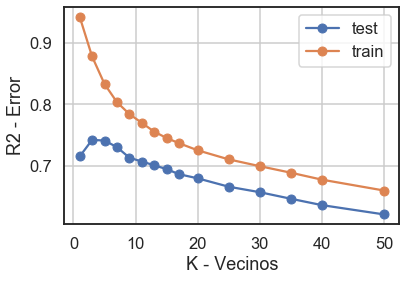

In [55]:
#### plt.plot(k_vecinos,lista_r2_train_k,'o-',label='train' )
plt.plot(k_vecinos,lista_r2_test_k,'o-',label='test')
plt.plot(k_vecinos,lista_r2_train_k,'o-',label='train')
plt.legend()
plt.xlabel('K - Vecinos')
plt.ylabel('R2 - Error')

plt.grid()
plt.show()

* Luego de entrenar y predecir con el conjunto de datos de entrenamiento y de testing tanto el modelo de Árbol de Desición con diferentes profundidades y el modelo de Vecinos Cercanos con diferentes número de vecinos determino que la elección de los mejores valores para los hiperparámetros que definen mejor los modelos para lograr predecir el PRECIO son los siguientes:

   ***Arbol de Decisión -----> max_depth = 6***
  
   ***Vecinos Cercanos -----> k= 13***
   
   ***Profundidad del Árbol: 6 - Error R2 en Train: 0.73 - Error R2 en Test: 0.69***
   
   ***Nro. de Vecinos: 13 - Error R2 en Train: 0.75 - Error R2 en Test: 0.70***


* Justifico mi elección ya que tanto los Errores R2 de test como los Errores R2 de train son lo suficientemente bajos y que la diferencia entre dichos errores es menor a uno. Además considero en ambos casos, con esos valores de los hiperparámetros ( `k=13 y max_depyh=6 `) el modelo se encuentra en el equilibro justo ya que no se hay un sobreajustado `overfiting` ni subajuste  `underfiting ` del modelo, es decir, que los modelos define correctamento mi objetivo ( `precio `) ni que los modelos son lo demasiado complejos para describir dicho objetivo.

Modelo: Árbol de Decisión
Error R2 en Train: 0.7351129903862494
Error R2 en Test: 0.6917814232700854


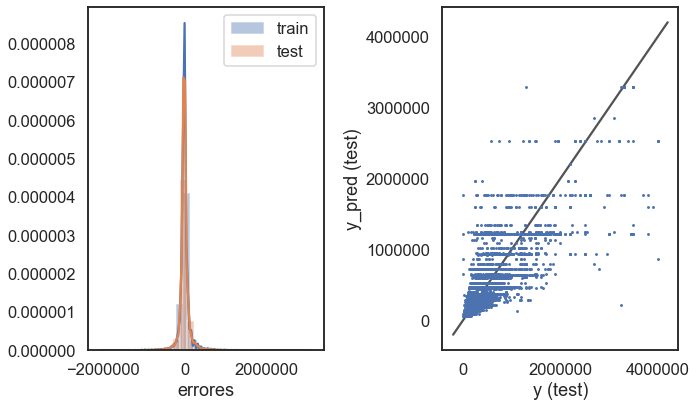

Modelo: Vecinos más cercanos
Error R2 en Train: 0.7555322752506626
Error R2 en Test: 0.7008432503376273


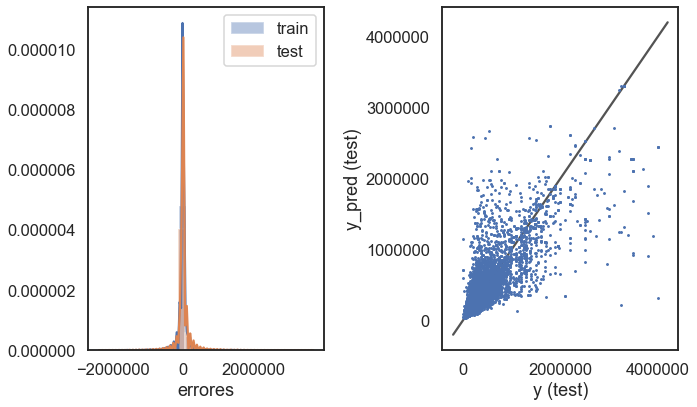

Modelo: Hipótesis --> Regresión Lineal
Error R2 en Train: 0.6306438506492839
Error R2 en Test: 0.6078892875489067


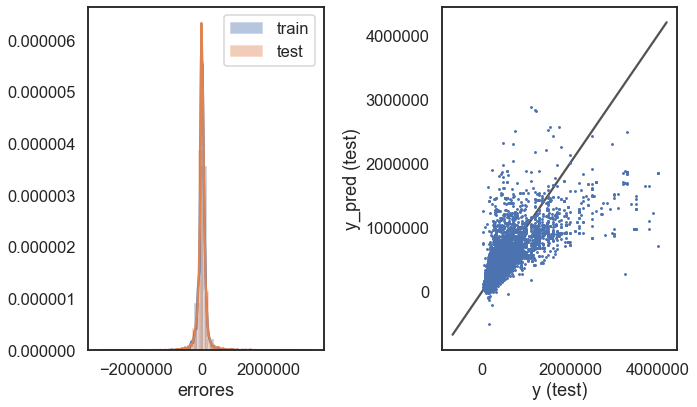

In [56]:
# COMPARACIÓN DE LOS MODELOS COn LOS HIPERPARÁMETROS SELECCIONADOS MÁS MI HIPÓTESIS
# DecisionTreeRegressor con profundidad max_depth = 6
# KNeighborsRegressor con vecinos cercanos k = 13
# LinearRegression --> (Hipótesis)


# Mido la precisión del modelo a través de la relación entre el valor real vs el valor predecido

clft = DecisionTreeRegressor(max_depth= 6 , random_state=42)
clfk = KNeighborsRegressor(n_neighbors= 13)
lineal = LinearRegression()

# Entreno los modelos con los valores de los hiperparámetros seleccionados 
# incluyendo como tercer modelo mi hipótesis

clft.fit(X_train,y_train)
clfk.fit(X_train,y_train)
lineal.fit(X_train,y_train)
    
modelos = ['Árbol de Decisión', 'Vecinos más cercanos', 'Hipótesis --> Regresión Lineal']

for i, model in enumerate([ clft, clfk, lineal]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    r2_train = r2_score(y_train, y_train_pred)
    r2_test =  r2_score(y_test, y_test_pred)
    print(f'Error R2 en Train: {r2_train}')
    print(f'Error R2 en Test: {r2_test}')
    
    plt.figure(figsize = (10,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show();

* Como se observa en los gráficos de arriba los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos ( `test y train `). Esto es un indicador de que me estoy aproximando a los datos de manera correcta. Elijo como  `**mejor modelo para predecir el PRECIO al Modelo de Vecinos Cercanos con un k=13** ` ya que la distribución del error de train y de test presenta la simetría más simétrica de los tres modelos y además la relación del  `y_test` versus  `y_test_predicido` presenta menos dispersión lo que implica que los datos están mejor representados con dicho modelo. Otro punto que tuve en cuenta que de los tres modelos el de los Vecinos Cercanos tiene el error R2 lo más cercano a 1 lo que demuestra que dicho modelo es un buen predictor del precio.

* **METODOLOGÍA*** Como mejora a la metodología propongo como ya he mencionada en unos párrafos arriba que debido a que la muestra se encuentra sesgada teniendo mucha información para el tipo de propiedad igual a DEPARTAMENTO separaría los datos y aplicaría un modelo de machine learning por cada tipo de propiedad ya que considero que los resultados que obtendría serían mucho más precisos.
* Otro punto que propongo sería reducir el número de features para predecir el precio, teniendo en cuenta el gráfico del mapa de calor mi X estaría formada por [surface_total, bathrooms, rooms] 

---